# Clustering - Hierarchical (Agglomeretive)

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

In [4]:
np.random.seed(0)

In [36]:
X, y = make_blobs(n_samples=50, centers=[[4,4],[-2,-1],[1,1],[10,4]], cluster_std=0.8)

In [38]:
X[0:5]

array([[11.80744716,  3.96619428],
       [-1.09869126, -1.86394521],
       [ 1.50018516, -0.28164612],
       [ 0.96857375,  0.0655252 ],
       [-1.26331294, -0.74501788]])

In [40]:
y[0:5]

array([3, 1, 2, 2, 1])

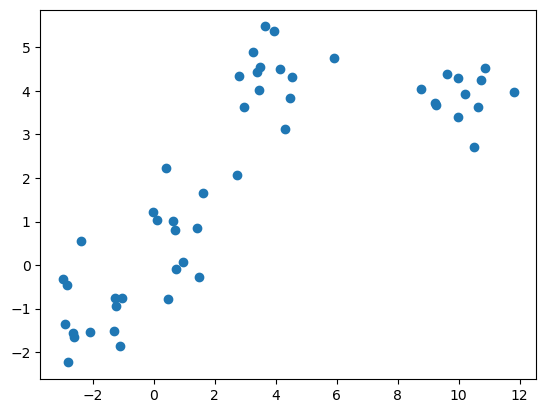

In [42]:
plt.scatter(X[:,0],X[:,1])

In [64]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='average')

In [66]:
agglom.fit(X,y)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [68]:
X.shape[0]

50

In [70]:
agglom.labels_

array([3, 1, 0, 0, 1, 1, 1, 3, 1, 1, 0, 1, 1, 0, 2, 3, 3, 3, 3, 2, 0, 0,
       2, 2, 1, 3, 3, 0, 2, 2, 2, 2, 3, 1, 2, 1, 0, 3, 2, 2, 3, 0, 0, 0,
       3, 2, 1, 2, 0, 1], dtype=int64)

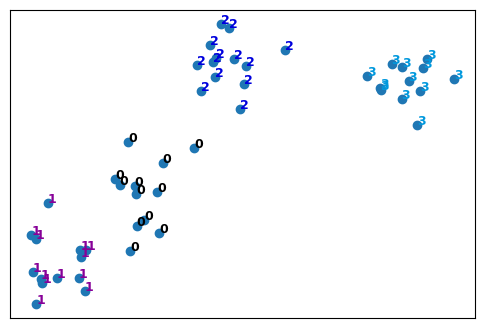

In [72]:
fig = plt.figure(figsize=(6,4))

x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)

X = (X-x_min)/(x_max-x_min)

for i in range(X.shape[0]):
    plt.text(X[i,0],X[i,1],str(agglom.labels_[i]),
            color = plt.cm.nipy_spectral(agglom.labels_[i]/10.),
            fontdict={'weight':'bold','size':9})
plt.xticks([])
plt.yticks([])
plt.scatter(X[:,0],X[:,1])
plt.show()

In [78]:
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

In [80]:
dist_matric = distance_matrix(X,X)
print(dist_matric)

[[0.         1.15444146 0.88823523 ... 0.56728015 0.66122116 1.27357024]
 [1.15444146 0.         0.27008739 ... 0.88631588 0.57178939 0.12474763]
 [0.88823523 0.27008739 0.         ... 0.63943768 0.31586079 0.38564467]
 ...
 [0.56728015 0.88631588 0.63943768 ... 0.         0.32449915 0.97599937]
 [0.66122116 0.57178939 0.31586079 ... 0.32449915 0.         0.67174249]
 [1.27357024 0.12474763 0.38564467 ... 0.97599937 0.67174249 0.        ]]


In [82]:
Z = hierarchy.linkage(dist_matric,'complete')

C:\Users\vvishwanath\AppData\Local\Temp\ipykernel_34456\3500715134.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matric,'complete')


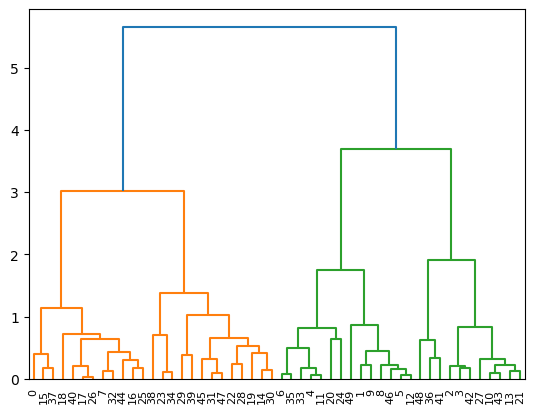

In [84]:
dendo = hierarchy.dendrogram(Z)